In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
file_path = '../data/raw/koi_cumulative_2.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,2,142.0,1.0,q1_q17_dr25_tce,5455.0,4.467,0.14,0.927,0.919,NaN,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2,25.0,2.0,q1_q17_dr25_tce,5455.0,4.467,0.14,0.927,0.919,NaN,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1,56.0,1.0,q1_q17_dr25_tce,5853.0,4.544,-0.18,0.868,0.961,NaN,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1,621.0,1.0,q1_q17_dr25_tce,5805.0,4.564,-0.52,0.791,0.836,NaN,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1,515.0,1.0,q1_q17_dr25_tce,6031.0,4.438,0.07,1.046,1.095,NaN,15.509


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2745 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_time0bk        9564 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_duration       9564 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_prad           9201 non-null   float64
 16  koi_teq            9201 

In [5]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9564.000000,8422.000000,9218.000000,9201.000000,9201.000000,9178.000000,9201.000000,9201.000000,0.0,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.406315,385.006768,1.243654,5706.823280,4.310157,-0.124431,1.728712,1.023706,NaN,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.873289,545.756200,0.664573,796.857947,0.432606,0.282111,6.127185,0.349447,NaN,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,2661.000000,0.047000,-2.500000,0.109000,0.000000,NaN,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,41.000000,1.000000,5310.000000,4.218000,-0.260000,0.829000,0.845000,NaN,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,143.000000,1.000000,5767.000000,4.438000,-0.100000,1.000000,0.974000,NaN,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,469.000000,1.000000,6112.000000,4.543000,0.070000,1.345000,1.101000,NaN,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,7.000000,2664.000000,8.000000,15896.000000,5.364000,0.560000,229.908000,3.735000,NaN,20.003000


In [6]:
cols_to_drop = [
    'kepid',
    'kepoi_name',
    'kepler_name',
    'koi_pdisposition',
    'koi_tce_delivname',
    'koi_fpflag_nt',
    'koi_sage',
]

In [7]:
df = df.drop(columns=cols_to_drop)

In [8]:
df.head()

,koi_disposition,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag
0,CONFIRMED,1.000,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,2,142.0,1.0,5455.0,4.467,0.14,0.927,0.919,15.347
1,CONFIRMED,0.969,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2,25.0,2.0,5455.0,4.467,0.14,0.927,0.919,15.347
2,CANDIDATE,0.000,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1,56.0,1.0,5853.0,4.544,-0.18,0.868,0.961,15.436
3,FALSE POSITIVE,0.000,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1,621.0,1.0,5805.0,4.564,-0.52,0.791,0.836,15.597
4,CONFIRMED,1.000,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1,515.0,1.0,6031.0,4.438,0.07,1.046,1.095,15.509


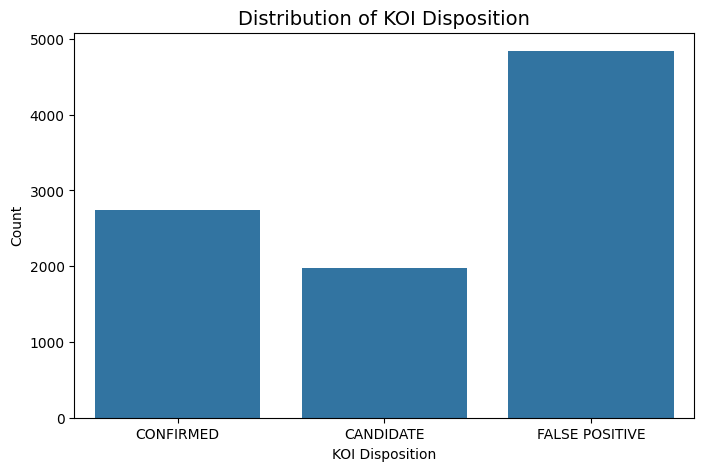

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='koi_disposition')
plt.title('Distribution of KOI Disposition', fontsize=14)
plt.xlabel('KOI Disposition')
plt.ylabel('Count')
plt.show()

In [10]:
df.isnull().mean() * 100

koi_disposition      0.000000
koi_score           15.788373
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_time0bk          0.000000
koi_impact           3.795483
koi_duration         0.000000
koi_depth            3.795483
koi_prad             3.795483
koi_teq              3.795483
koi_insol            3.356336
koi_model_snr        3.795483
koi_count            0.000000
koi_num_transits    11.940611
koi_tce_plnt_num     3.617733
koi_steff            3.795483
koi_slogg            3.795483
koi_smet             4.035968
koi_srad             3.795483
koi_smass            3.795483
koi_kepmag           0.010456
dtype: float64

In [11]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['koi_impact',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_smet',
 'koi_srad',
 'koi_smass',
 'koi_kepmag']

In [12]:
len(df[cols].dropna()) / len(df)

0.9336051861145964

In [13]:
new_df = df[cols].dropna()

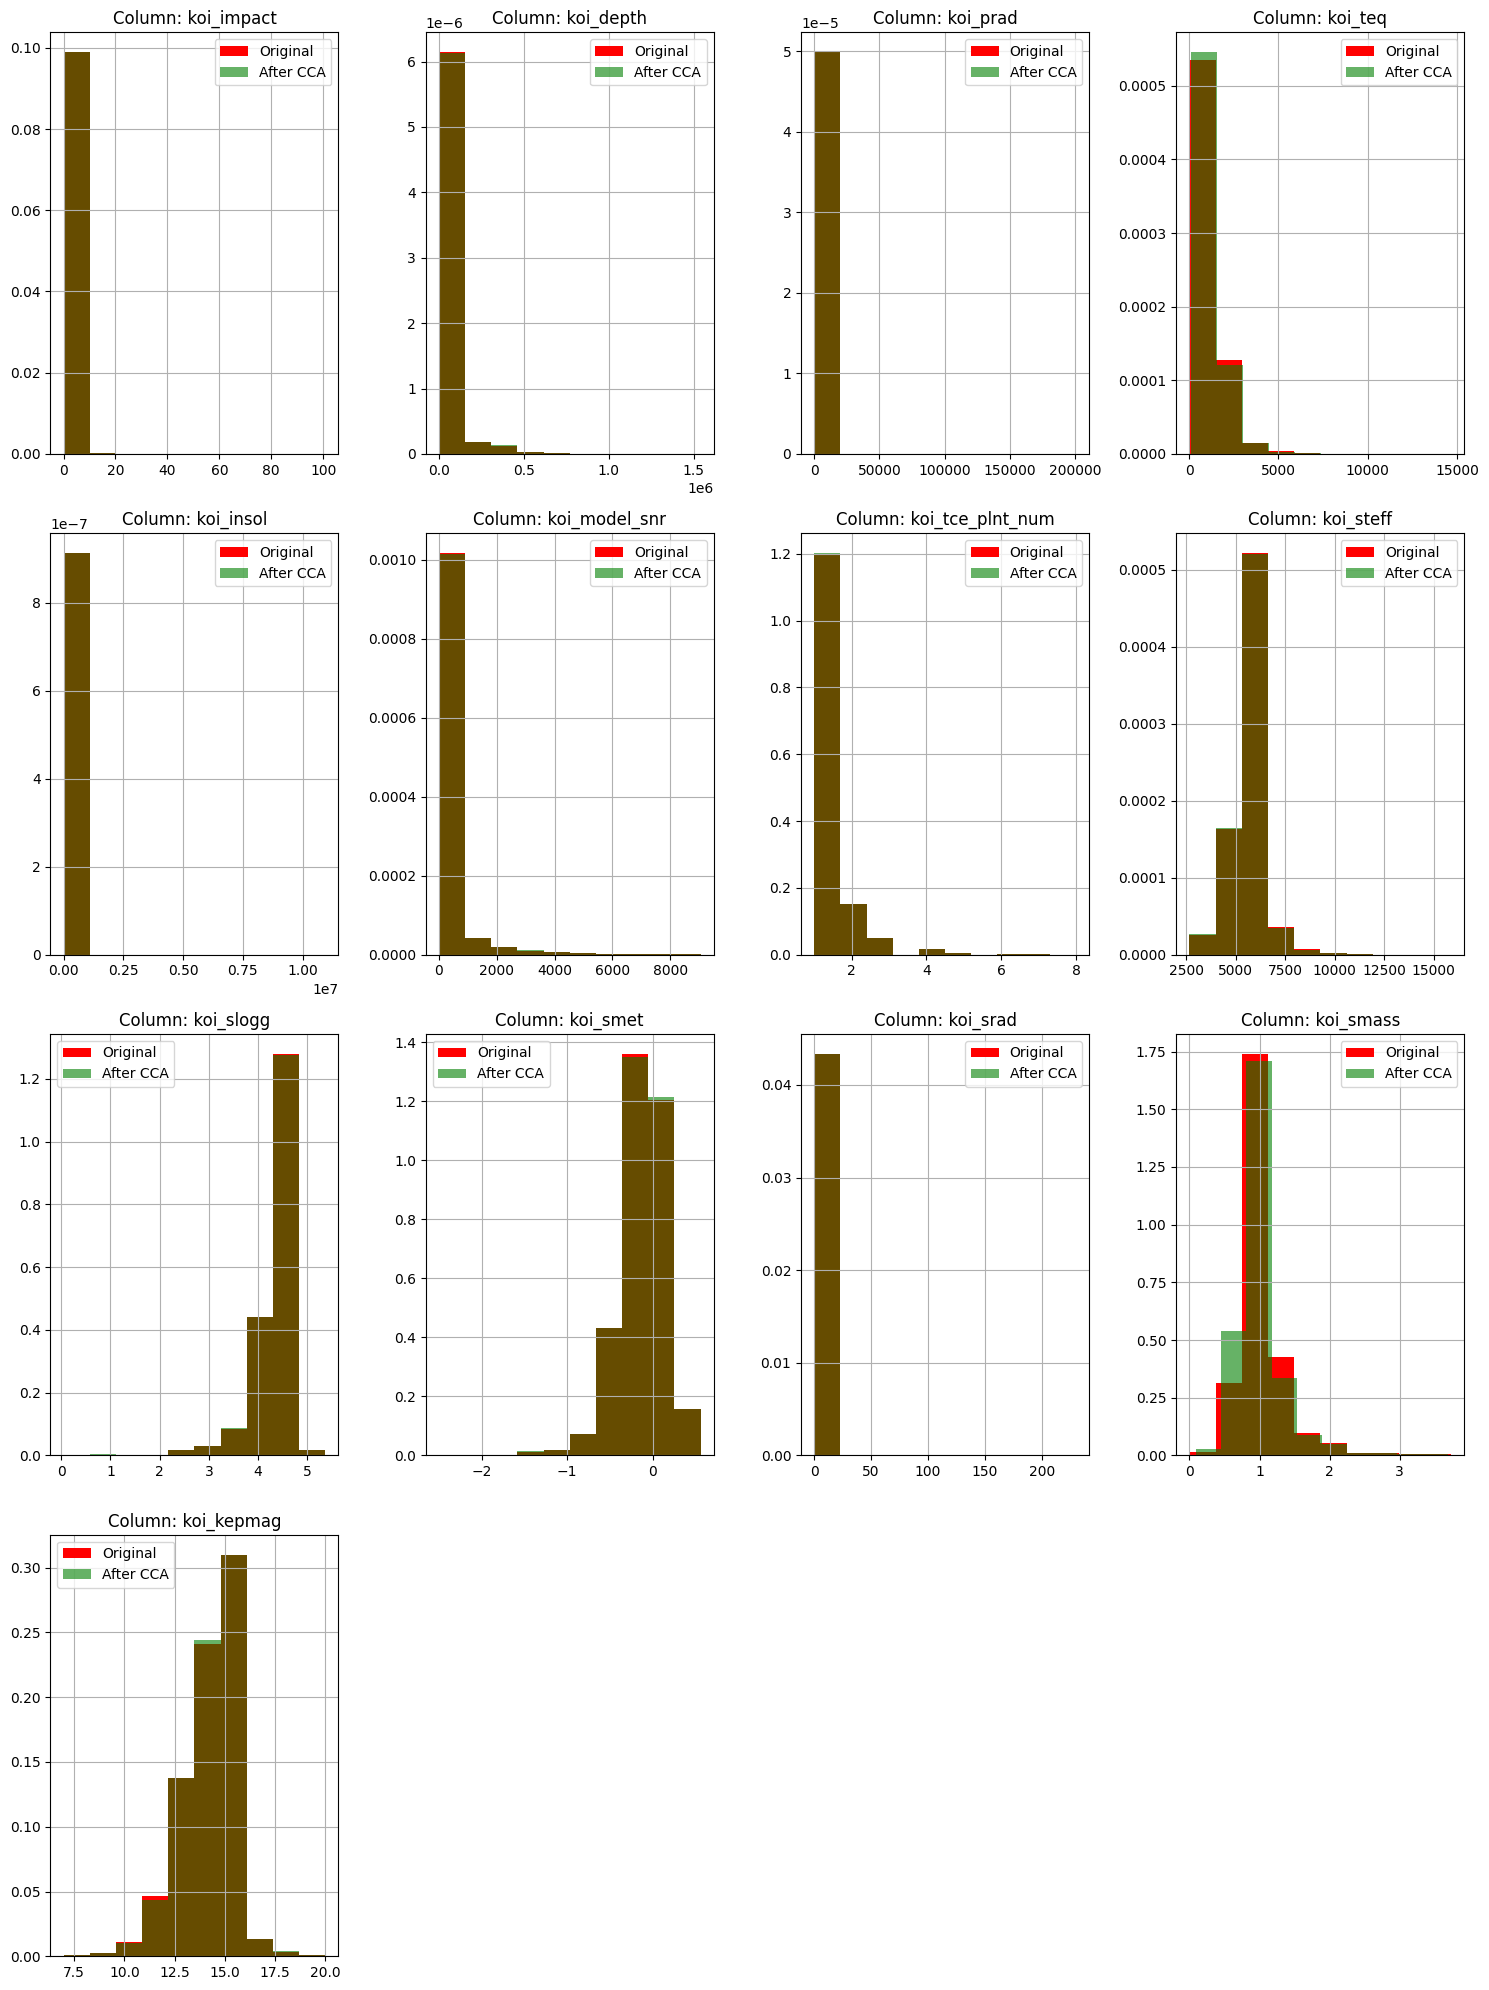

In [14]:
num_cols = len(cols)

cols_per_row = 4
rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row != 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    df[col].hist(ax=ax, density=True, color='red', label='Original')
    new_df[col].hist(ax=ax, density=True, color='green', label='After CCA', alpha=0.6)
    ax.set_title(f'Column: {col}')
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

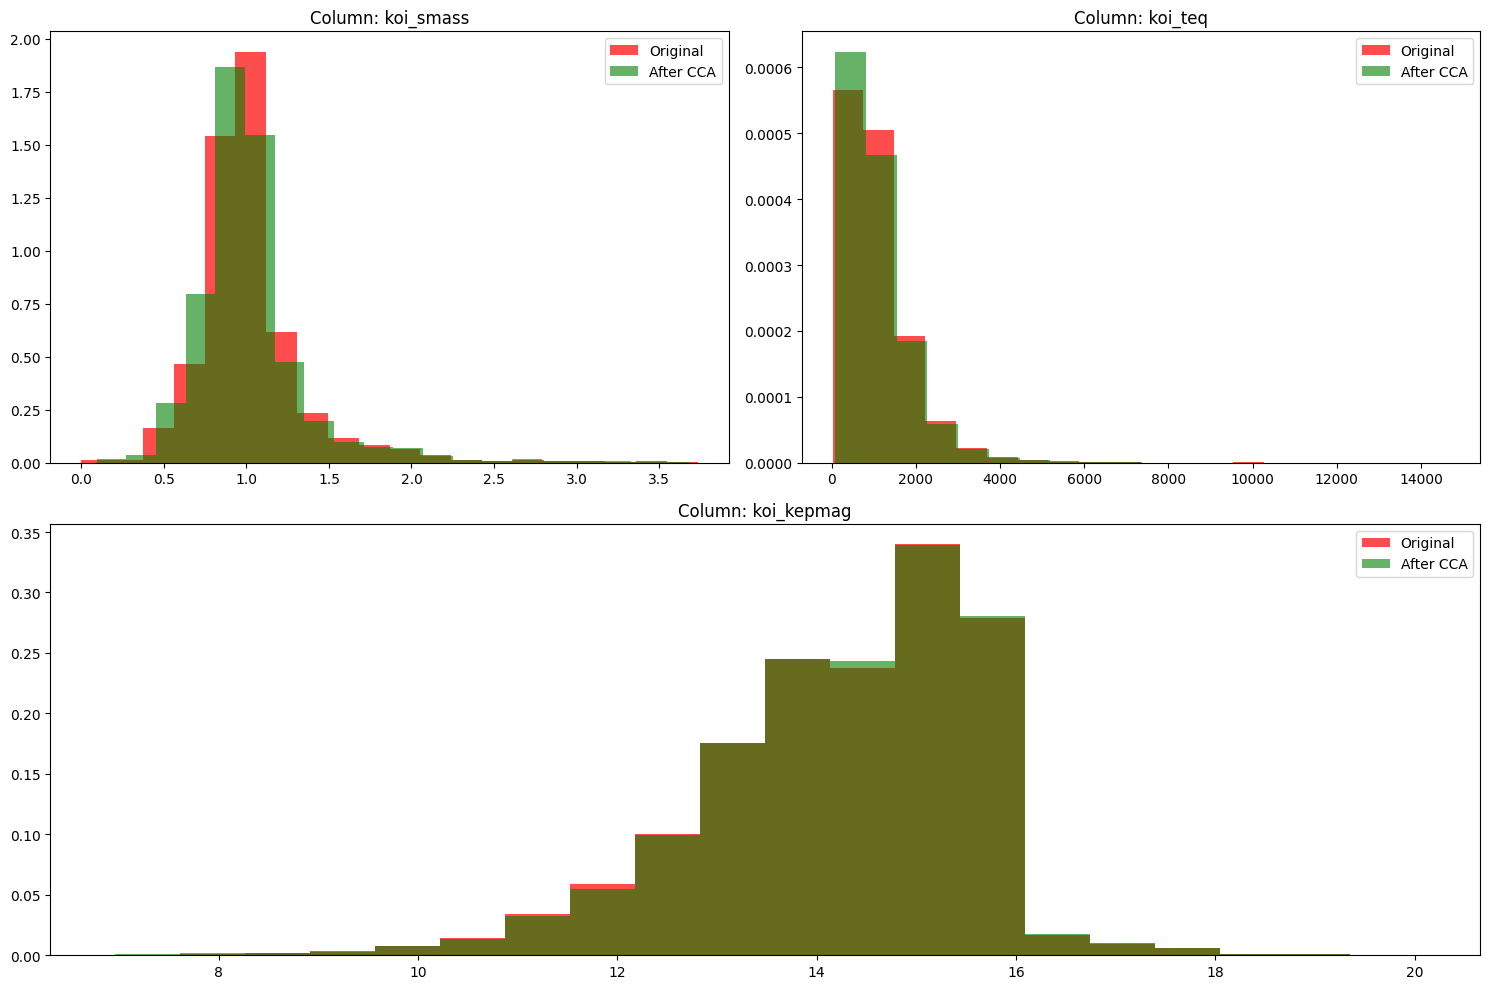

In [15]:
from matplotlib.gridspec import GridSpec

sample_cols = ['koi_smass', 'koi_teq', 'koi_kepmag']

fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, :])

axes = [ax1, ax2, ax3]

for i, col in enumerate(sample_cols):
    axes[i].hist(df[col], density=True, color='red', label='Original', bins=20, alpha=0.7)
    axes[i].hist(new_df[col], density=True, color='green', label='After CCA', bins=20, alpha=0.6)
    axes[i].set_title(f'Column: {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [16]:
columns_to_impute = ['koi_smass', 'koi_num_transits', 'koi_score']
minimal_missing_columns = list(set(cols) - set(columns_to_impute))
complete_columns = list(set(df.columns) - set(minimal_missing_columns) - set(columns_to_impute))

In [17]:
columns_to_impute

['koi_smass', 'koi_num_transits', 'koi_score']

In [18]:
minimal_missing_columns

['koi_impact',
 'koi_model_snr',
 'koi_depth',
 'koi_teq',
 'koi_smet',
 'koi_steff',
 'koi_slogg',
 'koi_kepmag',
 'koi_insol',
 'koi_tce_plnt_num',
 'koi_prad',
 'koi_srad']

In [19]:
complete_columns

['koi_fpflag_ec',
 'koi_disposition',
 'koi_time0bk',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_duration',
 'koi_count',
 'koi_period']

In [20]:
len(df.columns) == len(complete_columns) + len(minimal_missing_columns) + len(columns_to_impute)

True

In [21]:
df_filtered = df.dropna(subset=minimal_missing_columns)

In [22]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# df_filtered.iloc[:, 0] = le.fit_transform(df_filtered.iloc[:, 0])

# print("Category mapping:")
# for i, label in enumerate(le.classes_):
#     print(f"{label} -> {i}")

# print("\nFirst few rows of encoded data:\n")
# df_filtered.head()

In [23]:
len(df_filtered.columns)

23

In [24]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# Make copies to compare different methods
df_knn = df_filtered.copy()
df_mice = df_filtered.copy()
df_rf = df_filtered.copy()
df_median = df_filtered.copy()

In [25]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[columns_to_impute] = knn_imputer.fit_transform(df_filtered[columns_to_impute])

# MICE Imputation
mice_imputer = IterativeImputer(
    random_state=42, 
    missing_values=np.nan
)
df_mice[columns_to_impute] = mice_imputer.fit_transform(df_filtered[columns_to_impute])

# Random Forest Imputation
rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    missing_values=np.nan,
    random_state=42
)
df_rf[columns_to_impute] = rf_imputer.fit_transform(df_filtered[columns_to_impute])

# SImple median imputer
median_imputer = SimpleImputer(strategy="median")
df_median[columns_to_impute] = median_imputer.fit_transform(df_filtered[columns_to_impute])

/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


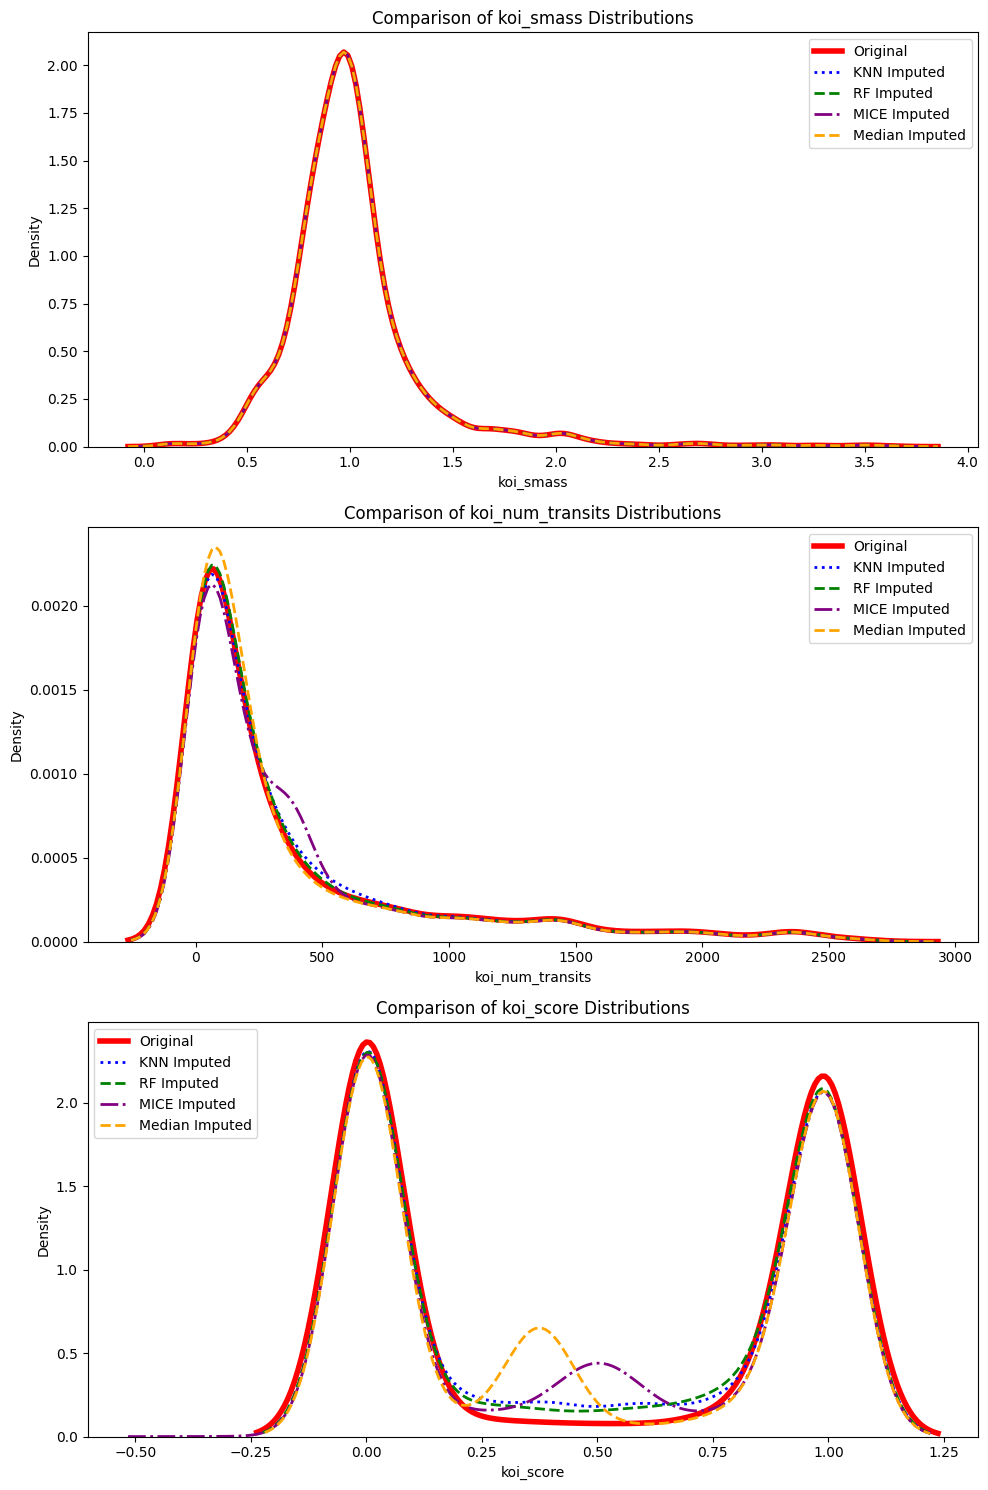

In [26]:
fig, axes = plt.subplots(len(columns_to_impute), 1, figsize=(10, 5 * len(columns_to_impute)))

for i, column in enumerate(columns_to_impute):
    sns.kdeplot(
        data=df_filtered[column], 
        label="Original", 
        ax=axes[i], 
        color="red", 
        linewidth=4,
        linestyle="solid"
    )
    sns.kdeplot(
        data=df_knn[column], 
        label="KNN Imputed", 
        ax=axes[i], 
        color="blue",
        linewidth=2,
        linestyle="dotted"
    )
    sns.kdeplot(
        data=df_rf[column], 
        label="RF Imputed", 
        ax=axes[i], 
        color="green", 
        linewidth=2,
        linestyle="--"
    )
    sns.kdeplot(
        data=df_mice[column], 
        label="MICE Imputed", 
        ax=axes[i], 
        color="purple",
        linewidth=2,
        linestyle="dashdot"
    )
    sns.kdeplot(
        data=df_median[column], 
        label="Median Imputed", 
        ax=axes[i], 
        color="orange", 
        linewidth=2,
        linestyle="dashed"
    )
    axes[i].set_title(f"Comparison of {column} Distributions")
    axes[i].legend()

plt.tight_layout()
plt.show()

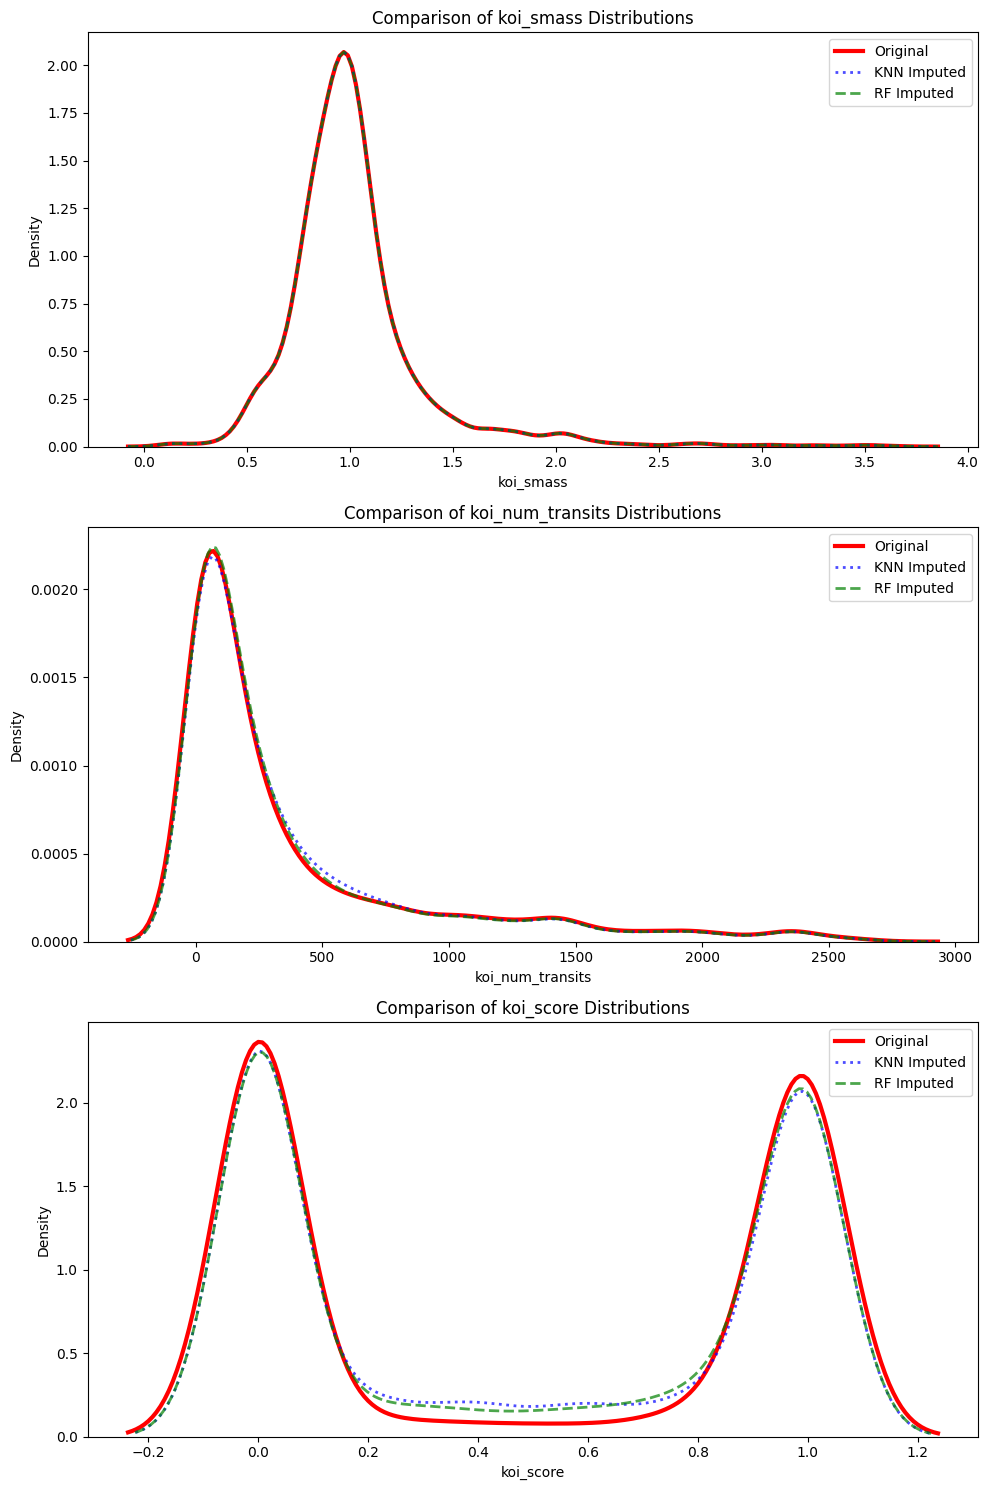

In [27]:
# Comparing KNN and RF imputers
fig, axes = plt.subplots(len(columns_to_impute), 1, figsize=(10, 5 * len(columns_to_impute)))

for i, column in enumerate(columns_to_impute):
    sns.kdeplot(
        data=df_filtered[column], 
        label="Original", 
        ax=axes[i], 
        color="red", 
        linewidth=3
    )
    sns.kdeplot(
        data=df_knn[column], 
        label="KNN Imputed", 
        ax=axes[i], 
        color="blue",
        linewidth=2,
        linestyle='dotted',
        alpha=0.7
    )
    sns.kdeplot(
        data=df_rf[column], 
        label="RF Imputed", 
        ax=axes[i], 
        color="green", 
        linewidth=2,
        linestyle='dashed',
        alpha=0.7
    )
    axes[i].set_title(f"Comparison of {column} Distributions")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [28]:
len(df_rf.columns)

23

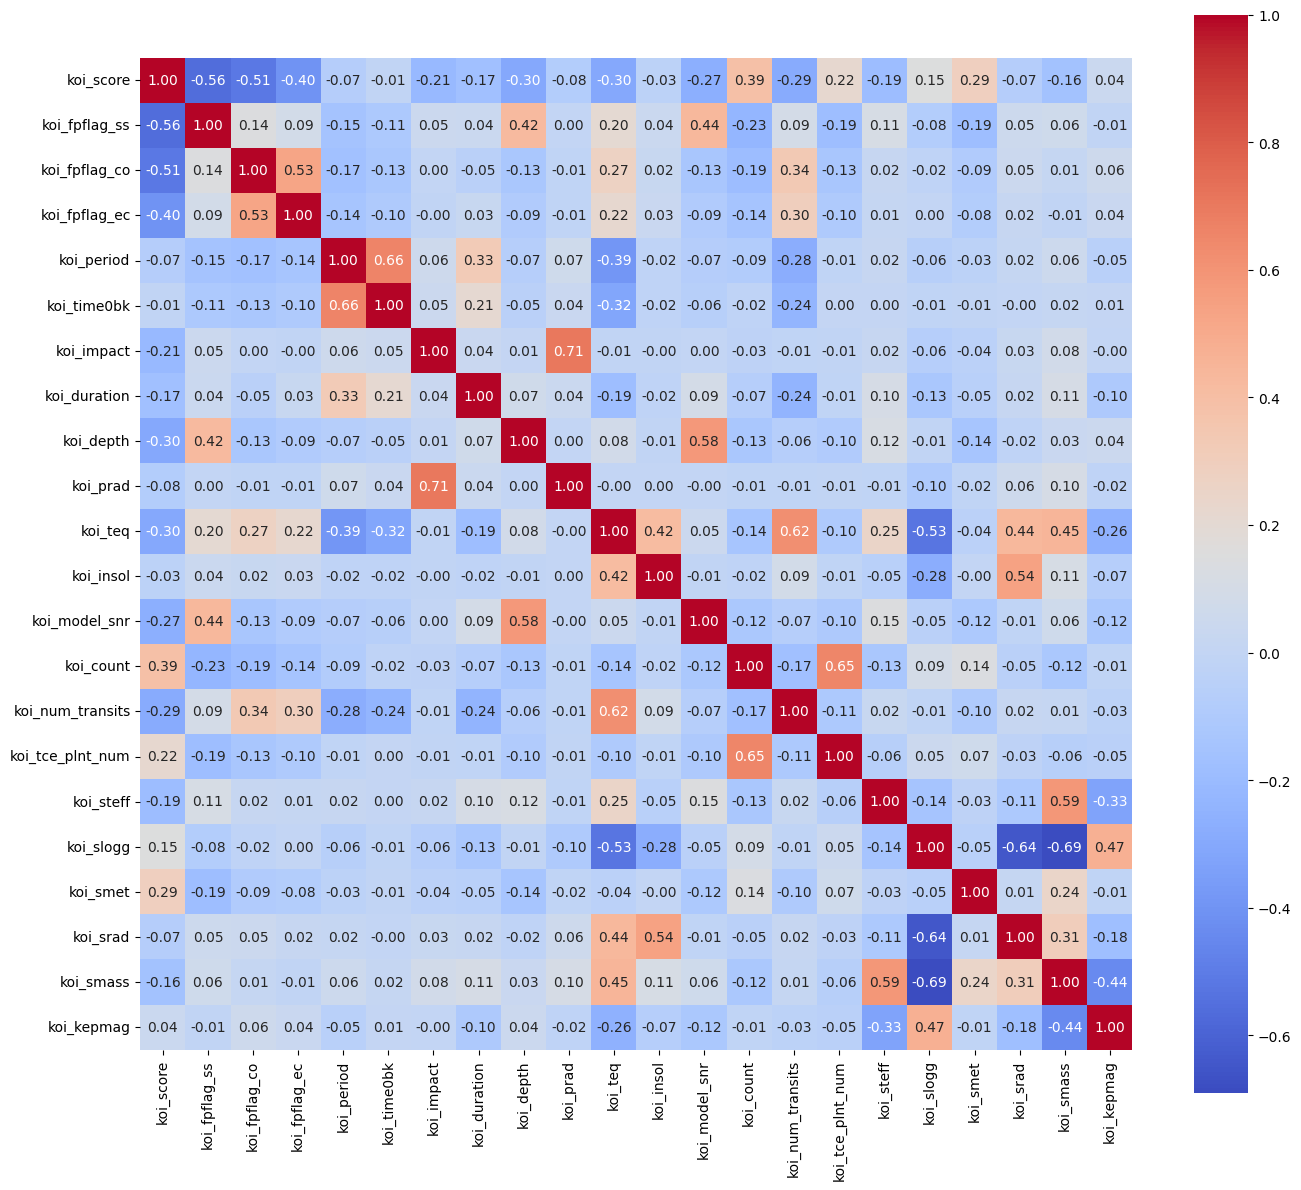

In [31]:
correlation_matrix = df_filtered.drop(columns=['koi_disposition']).corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.show()

In [32]:
df_rf.head()

,koi_disposition,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag
0,CONFIRMED,1.000,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,2,142.0,1.0,5455.0,4.467,0.14,0.927,0.919,15.347
1,CONFIRMED,0.969,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2,25.0,2.0,5455.0,4.467,0.14,0.927,0.919,15.347
2,CANDIDATE,0.000,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1,56.0,1.0,5853.0,4.544,-0.18,0.868,0.961,15.436
3,FALSE POSITIVE,0.000,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1,621.0,1.0,5805.0,4.564,-0.52,0.791,0.836,15.597
4,CONFIRMED,1.000,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1,515.0,1.0,6031.0,4.438,0.07,1.046,1.095,15.509


In [33]:
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df_rf.drop(columns=['koi_disposition'])
y = df_rf['koi_disposition']

In [34]:
X.head()

,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag
0,1.000,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,2,142.0,1.0,5455.0,4.467,0.14,0.927,0.919,15.347
1,0.969,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2,25.0,2.0,5455.0,4.467,0.14,0.927,0.919,15.347
2,0.000,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1,56.0,1.0,5853.0,4.544,-0.18,0.868,0.961,15.436
3,0.000,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1,621.0,1.0,5805.0,4.564,-0.52,0.791,0.836,15.597
4,1.000,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1,515.0,1.0,6031.0,4.438,0.07,1.046,1.095,15.509


In [36]:
y.head()

0         CONFIRMED
1         CONFIRMED
2         CANDIDATE
3    FALSE POSITIVE
4         CONFIRMED
Name: koi_disposition, dtype: object

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)

# Predict and evaluate
y_pred = brf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future 

Confusion Matrix:
[[320  32   8]
 [ 68 478   5]
 [ 84   1 790]]

Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.68      0.89      0.77       360
     CONFIRMED       0.94      0.87      0.90       551
FALSE POSITIVE       0.98      0.90      0.94       875

      accuracy                           0.89      1786
     macro avg       0.87      0.89      0.87      1786
  weighted avg       0.91      0.89      0.89      1786



In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled
)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[786  61  26]
 [ 60 812   2]
 [ 86   1 787]]

Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.84      0.90      0.87       873
     CONFIRMED       0.93      0.93      0.93       874
FALSE POSITIVE       0.97      0.90      0.93       874

      accuracy                           0.91      2621
     macro avg       0.91      0.91      0.91      2621
  weighted avg       0.91      0.91      0.91      2621



In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import (
    SMOTE,           # Standard SMOTE
    BorderlineSMOTE, # Focuses on borderline samples
    ADASYN,          # Adaptive synthetic sampling
    SVMSMOTE         # SVM-based SMOTE
)

def evaluate_smote_variants(X, y):
    # SMOTE variants to evaluate
    smote_methods = {
        'Standard SMOTE': SMOTE(random_state=42),
        'Borderline SMOTE-1': BorderlineSMOTE(random_state=42, kind='borderline-1'),
        'Borderline SMOTE-2': BorderlineSMOTE(random_state=42, kind='borderline-2'),
        'ADASYN': ADASYN(random_state=42),
        'SVM SMOTE': SVMSMOTE(random_state=42)
    }
    
    # Results storage
    results = {}
    
    # Iterate through SMOTE methods
    for smote_name, smote_method in smote_methods.items():
        print(f"\n--- Evaluating {smote_name} ---")
        
        # Apply SMOTE
        X_resampled, y_resampled = smote_method.fit_resample(X, y)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, 
            y_resampled, 
            test_size=0.2, 
            random_state=42, 
            stratify=y_resampled
        )
        
        # Print class distribution
        print("Class Distribution After SMOTE:")
        print(pd.Series(y_resampled).value_counts())
        
        # Train Random Forest
        rf_classifier = RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            class_weight='balanced'
        )
        rf_classifier.fit(X_train, y_train)
        
        # Predict
        y_pred = rf_classifier.predict(X_test)
        
        # Evaluation
        print("\nClassification Report:")
        report = classification_report(y_test, y_pred, output_dict=True)
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        print("\nConfusion Matrix:")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        
        # Store results
        results[smote_name] = {
            'classifier': rf_classifier,
            'classification_report': report,
            'confusion_matrix': conf_matrix
        }
    
    return results

# Feature Importance Function
def get_feature_importance(results):
    feature_importance_dict = {}
    
    for smote_name, result in results.items():
        classifier = result['classifier']
        
        # Assuming X is still in scope from previous operation
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': classifier.feature_importances_
        }).sort_values('importance', ascending=False)
        
        feature_importance_dict[smote_name] = feature_importance
        
        print(f"\nTop 10 Important Features for {smote_name}:")
        print(feature_importance.head(10))
    
    return feature_importance_dict

# Usage
try:
    # Ensure X and y are prepared beforehand
    # X should be your feature DataFrame
    # y should be your target series/array
    
    # Evaluate SMOTE variants
    smote_results = evaluate_smote_variants(X_scaled, y)
    
    # Get feature importances
    feature_importances = get_feature_importance(smote_results)
    
except Exception as e:
    print("An error occurred:", e)

# Optional: Compare Overall Performance
def compare_smote_performance(results):
    print("\nSMOTE Method Performance Comparison:")
    for smote_name, result in results.items():
        avg_f1 = result['classification_report']['macro avg']['f1-score']
        print(f"{smote_name}: Macro Avg F1-Score = {avg_f1:.4f}")

# Call comparison function
compare_smote_performance(smote_results)


--- Evaluating Standard SMOTE ---
Class Distribution After SMOTE:
koi_disposition
CONFIRMED         4368
CANDIDATE         4368
FALSE POSITIVE    4368
Name: count, dtype: int64

Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.84      0.91      0.87       873
     CONFIRMED       0.94      0.92      0.93       874
FALSE POSITIVE       0.96      0.90      0.93       874

      accuracy                           0.91      2621
     macro avg       0.91      0.91      0.91      2621
  weighted avg       0.91      0.91      0.91      2621


Confusion Matrix:
[[792  54  27]
 [ 65 807   2]
 [ 84   1 789]]

--- Evaluating Borderline SMOTE-1 ---
Class Distribution After SMOTE:
koi_disposition
CONFIRMED         4368
CANDIDATE         4368
FALSE POSITIVE    4368
Name: count, dtype: int64

Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.84      0.89      0.86       873
     CONFIRMED     